# Practicando los primeros pasos con OpenCV

Vamos a leer una imagen correspondiente a una fotografía aérea de un bosque.

Luego vamos a experimentar con los canales RGB y HSV, y por último vamos a segmentar una parte de la imagen.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 8)

## Lectura de imágenes usando OpenCV

In [2]:
# imagen sacada de https://www.elplural.com/uploads/s1/54/26/31/foto-bosque-satelite_4_800x450.png

image_name = "images/foto-bosque-satelite.jpg"
img = cv.imread(image_name,cv.IMREAD_COLOR)

In [3]:
print("Tamaño de la imagen ", img.shape)

Tamaño de la imagen  (708, 800, 3)


## Display de las imágenes usando Matplotlib

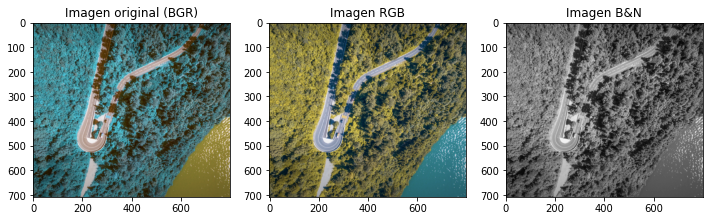

In [4]:
plt.figure(figsize=[12,5])

plt.subplot(131); plt.imshow(img);plt.title("Imagen original (BGR)");

# Matplotlib espera la imagen en formato RGB, pero OpenCV guarda las imágenes en formato BGR.
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# es equivalente a img[:, :, ::-1]
plt.subplot(132); plt.imshow(img_rgb);plt.title("Imagen RGB");

# Imagen en B&N
img_bn = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.subplot(133); plt.imshow(img_bn, cmap='gray');plt.title("Imagen B&N");

## Split & Merging de canales de color

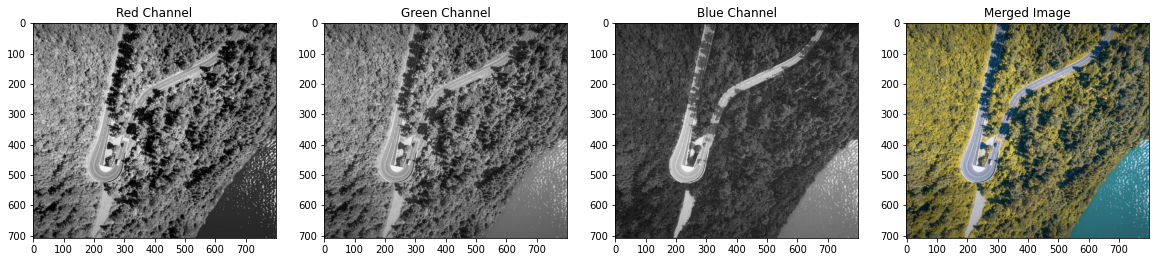

In [5]:
# Split de the la imagen en componentes B, G, R
img_b, img_g, img_r = cv.split(img)

# Display de los canales por separado
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(img_g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(img_b,cmap='gray');plt.title("Blue Channel");

# El Merge de los canales vuelve a componer una imagen BGR (vuelvo al original)
imgMerged = cv.merge((img_b, img_g, img_r))
# la paso a RGB para plotear
imgMerged = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(144);plt.imshow(img_rgb);plt.title("Merged Image");


## Cambiando al espacio de color HSV

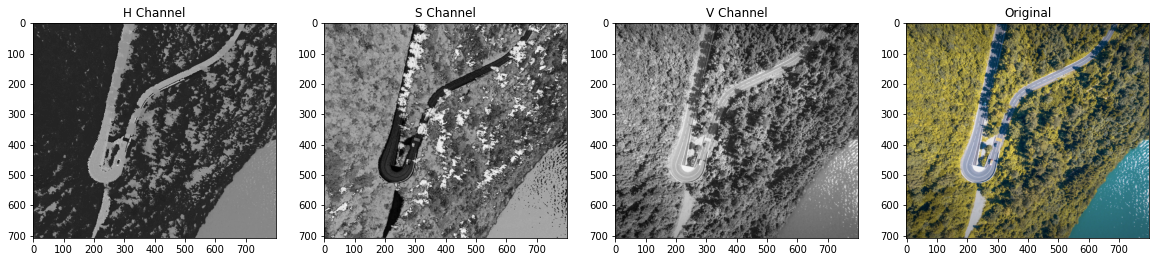

In [6]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split de la imagen en componentes H, S, V
img_h, img_s, img_v = cv.split(img_hsv)

# Display de los canales por separado
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(img_s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(img_v,cmap='gray');plt.title("V Channel");

# Imagen original
plt.subplot(144);plt.imshow(img_rgb);plt.title("Original");

## Modificando los canales por separado

### RGB

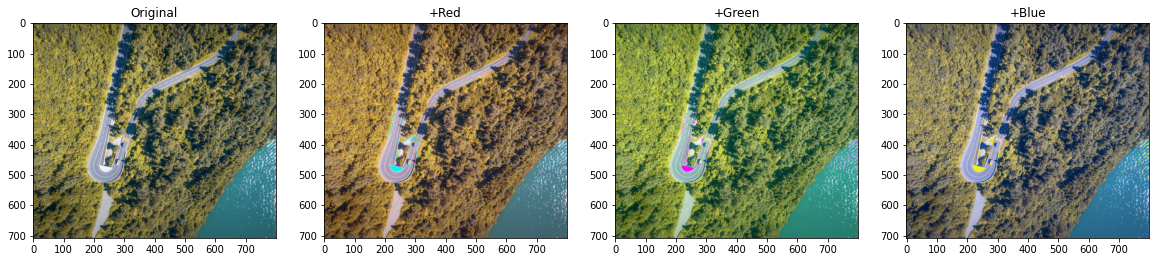

In [7]:
plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(img_rgb);plt.title("Original");

# Sumamos 'un poco' de rojo, verde y azul
img_mas_red = cv.merge((img_b,img_g,img_r+25))
img_mas_green = cv.merge((img_b,img_g+25,img_r))
img_mas_blue = cv.merge((img_b+25,img_g,img_r))

# Para plotearlos los pasamos a RGB
img_mas_red = cv.cvtColor(img_mas_red, cv.COLOR_BGR2RGB)
img_mas_green = cv.cvtColor(img_mas_green, cv.COLOR_BGR2RGB)
img_mas_blue = cv.cvtColor(img_mas_blue, cv.COLOR_BGR2RGB)

# Mostramos las imágenes modificadas
plt.subplot(142);plt.imshow(img_mas_red);plt.title("+Red");
plt.subplot(143);plt.imshow(img_mas_green);plt.title("+Green");
plt.subplot(144);plt.imshow(img_mas_blue);plt.title("+Blue");


### HVS

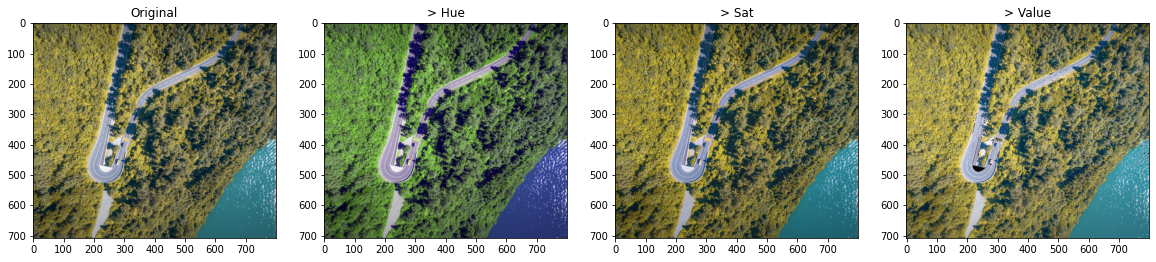

In [8]:
plt.figure(figsize=[20,5])

plt.subplot(141);plt.imshow(img_rgb);plt.title("Original");

# Sumamos 'un poco' de hue (tono), saturation y value
img_mas_hue = cv.merge((img_h+20,img_s,img_v))
img_mas_sat = cv.merge((img_h,img_s+20,img_v))
img_mas_value = cv.merge((img_h,img_s,img_v+20))

# Para plotearlos los pasamos a RGB
img_mas_hue = cv.cvtColor(img_mas_hue, cv.COLOR_HSV2RGB)
img_mas_sat = cv.cvtColor(img_mas_sat, cv.COLOR_HSV2RGB)
img_mas_val = cv.cvtColor(img_mas_value, cv.COLOR_HSV2RGB)

plt.subplot(142);plt.imshow(img_mas_hue);plt.title("> Hue");
plt.subplot(143);plt.imshow(img_mas_sat);plt.title("> Sat");
plt.subplot(144);plt.imshow(img_mas_val);plt.title("> Value");

## Anotaciones en imágenes

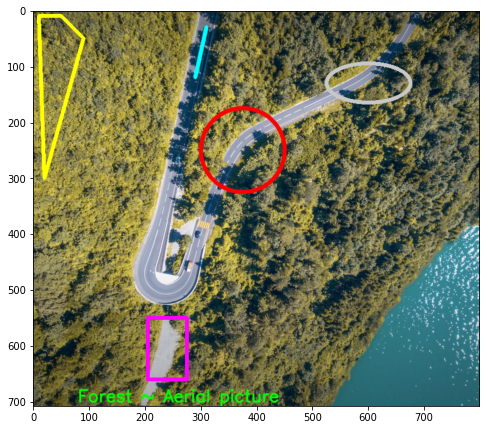

In [9]:
imageAnnotated = img.copy()

# Dibujamos algunas figuras 'random' sobre la imagen
cv.line(imageAnnotated, (290, 120), (310, 30), (255, 255, 0), thickness=5, lineType=cv.LINE_AA);
cv.circle(imageAnnotated, (375,250), 75, (0, 0, 255), thickness=5, lineType=cv.LINE_AA);
cv.rectangle(imageAnnotated, (205, 550), (275,660), (255, 0, 255), thickness=5, lineType=cv.LINE_8);
cv.ellipse(imageAnnotated,(600,130),(75,35),0,0,360, (200, 200, 200), thickness=5, lineType=cv.LINE_8);

pts = np.array([[10,10],[20,300],[90,50],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(imageAnnotated,[pts],True,(0,255,255), thickness=5, lineType=cv.FILLED);
    
text = "Forest ~ Aerial picture"
fontFace = cv.FONT_HERSHEY_SIMPLEX
fontScale = 1
fontColor = (0, 255, 0)
fontThickness = 2
fontLine = cv.LINE_AA
cv.putText(imageAnnotated, text, (80, 700), fontFace, fontScale, fontColor, fontThickness, fontLine);

plt.imshow(imageAnnotated[:,:,::-1])
plt.show()


## Mapas de Colores

Por defecto, el colormap cubre toda el rango de valores de los datos.
`vmin` y `vmax` recortan la paleta de colores, limitando el rango de valores.

Imshow: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

Colormap: https://matplotlib.org/stable/gallery/color/colormap_reference.html

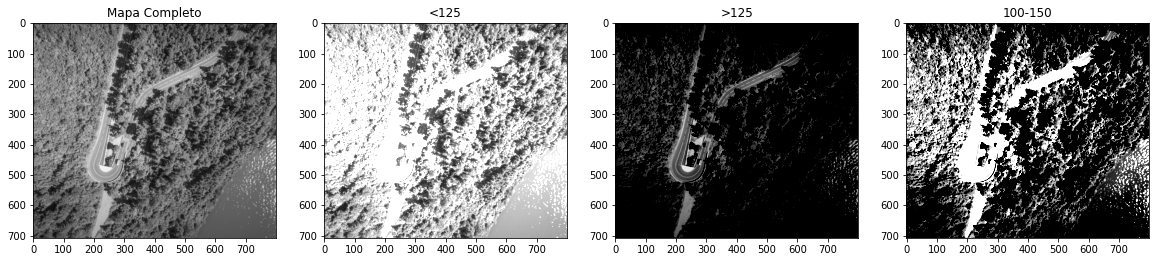

In [10]:
plt.figure(figsize=[20,5])
plt.subplot(141), plt.imshow(img_bn, cmap='gray', vmin=0, vmax=255);plt.title("Mapa Completo");
plt.subplot(142), plt.imshow(img_bn, cmap='gray', vmin=0, vmax=125);plt.title("<125");
plt.subplot(143), plt.imshow(img_bn, cmap='gray', vmin=125, vmax=255);plt.title(">125");
plt.subplot(144), plt.imshow(img_bn, cmap='gray', vmin=100, vmax=150);plt.title("100-150");

## Espacios de color

Vamos a intentar segmentar el asfalto

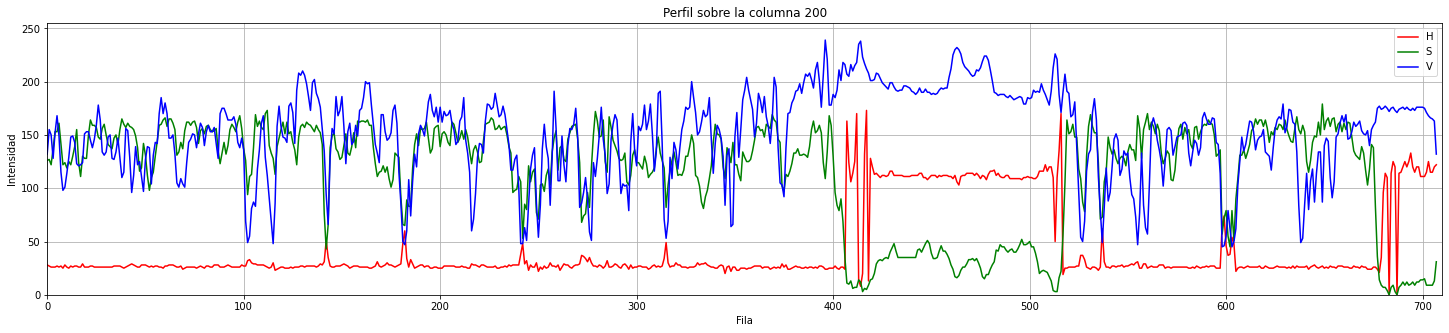

In [11]:
# Vamos a extraer los píxeles del asfalto (color gris)

# Primera parte: encontramos un espacio de color conveniente para la discriminación

plt.figure(figsize=[25,5])
idx_col = 200
perfil_color = img_hsv[:,idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,710)
plt.ylim(0,255)
plt.legend()
plt.show()

La curva de Hue, discrimina fácilmente el color del asfalto del resto. (alrededor de 120)
La saturación también se diferencia. Es muy baja en esa área.

Color medio: (111.56833333333334, 40.810833333333335, 191.55416666666667, 0.0)


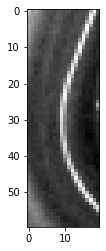

In [12]:
# Tomamos una muestra de la imagen donde se vea el asfalto.
muestra = img_hsv[440:500,190:210,:]

color_medio = cv.mean(muestra)

print(f"Color medio: {color_medio}")

plt.figure(figsize=[4,4])
muestra = cv.cvtColor(muestra, cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.imshow(muestra, cmap='gray')
plt.show()

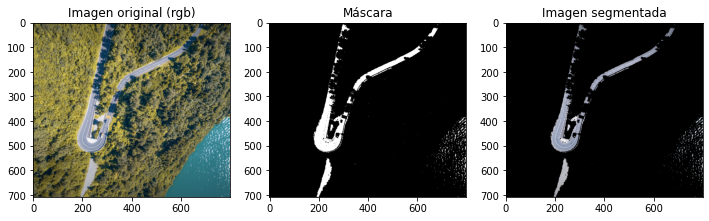

In [13]:
# Definimos el rango HSV para la máscara (en base al perfil anterior)
# construimos la máscara y mostramos la imagen segmentada, distinguiendo el asfalto del resto

val_h_medio = color_medio[0]
# color = (h, s, v)
color_l = (val_h_medio-20, 0, 100)
color_u = (val_h_medio+20, 60, 255)

mask = cv.inRange(img_hsv, color_l,  color_u)
img_segmentada = cv.bitwise_and(img, img, mask=mask)

plt.figure(figsize=[12, 4])
plt.subplot(131);plt.imshow(img_rgb);plt.title("Imagen original (rgb)");
plt.subplot(132);plt.imshow(mask,cmap='gray');plt.title("Máscara");
plt.subplot(133);plt.imshow(img_segmentada[:,:,::-1]);plt.title("Imagen segmentada");

Vamos a hacerlo en base al espacio RGB

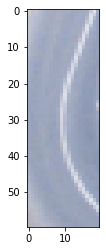

In [14]:
# Tomamos una muestra en RGB del asfalto

img_muestra = img_rgb[440:500,190:210,:]

plt.figure(figsize=[4,4])
plt.imshow(img_muestra)
plt.show()

In [15]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del asfalto en el espacio RGB

color_mean, color_std = cv.meanStdDev(img_muestra)

print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[161.23416666666668, 170.05833333333334, 191.55333333333334]
[16.032134375649598, 13.979625551335694, 10.82930386600289]


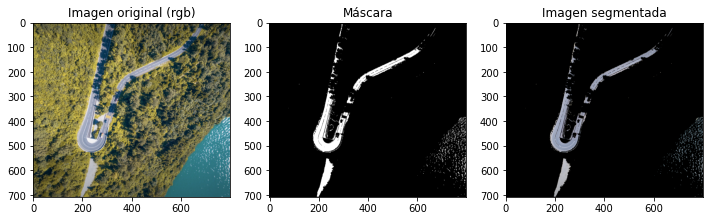

In [16]:
# Construimos una máscara basándonos en los puntos que estén cerca de color_mean en un radio menor que 3 sigmas
# Mostramos la imagen segmentada

mask = cv.inRange(img_rgb, color_mean-color_std*3,  color_mean+color_std*3)
img_segmentada = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=[12, 4])
plt.subplot(131);plt.imshow(img_rgb);plt.title("Imagen original (rgb)");
plt.subplot(132);plt.imshow(mask,cmap='gray');plt.title("Máscara");
plt.subplot(133);plt.imshow(img_segmentada);plt.title("Imagen segmentada");